<a href="https://colab.research.google.com/github/xavierf8/FRUITES/blob/main/FRUITES_INFER%C3%88NCIA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive/MyDrive/TFG

Mounted at /gdrive
/gdrive/MyDrive/TFG


In [ ]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [ ]:
!pip uninstall h5py
!pip install h5py==2.10


Uninstalling h5py-3.1.0:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/h5py-3.1.0.dist-info/*
    /usr/local/lib/python3.7/dist-packages/h5py.libs/libaec-9c9e97eb.so.0.0.10
    /usr/local/lib/python3.7/dist-packages/h5py.libs/libhdf5-00e8fae8.so.200.0.0
    /usr/local/lib/python3.7/dist-packages/h5py.libs/libhdf5_hl-383c339f.so.200.0.0
    /usr/local/lib/python3.7/dist-packages/h5py.libs/libsz-e7aa62f5.so.2.0.1
    /usr/local/lib/python3.7/dist-packages/h5py.libs/libz-eb09ad1d.so.1.2.3
    /usr/local/lib/python3.7/dist-packages/h5py/*
Proceed (y/n)? y
  Successfully uninstalled h5py-3.1.0
     |████████████████████████████████| 2.9MB 30.3MB/s 


In [ ]:
!pip list

In [ ]:
!git clone https://github.com/matterport/Mask_RCNN
%cd Mask_RCNN
!pip3 install -r requirements.txt
!python3 setup.py install

fatal: destination path 'Mask_RCNN' already exists and is not an empty directory.
/gdrive/MyDrive/TFG/Mask_RCNN
     |████████████████████████████████| 204kB 32.5MB/s 
     |████████████████████████████████| 163kB 44.5MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp37-none-any.whl size=7557 sha256=25df9ea5d9a56be973d956ce1365eb73a1fbd173a519230da7c7193ea8260972
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: kapre 0.3.5 has requirement tensorflow>=2.0.0, but you'll have tensorflow 1.15.2 which is incompatible.
  Found existing installation: gast 0.4.0
    Uninstalling gast-0.4.0:
      Successfully uninstalled gast-0.4.0
/usr/local/lib/python3.7/dist-packages/setuptools/dist.py:694: UserWarning: Usage of dash-separated 'description-file' will not be supported in future versions. Please use the underscore name 'description_file' instead
  % (opt, underscore_opt))
/usr/local/lib/python3.7/dist

In [ ]:
!git clone https://github.com/cocodataset/cocoapi.git
%cd cocoapi/PythonAPI
!make
%cd ../../

In [ ]:
import os
import sys
import random
import time
import numpy as np
import cv2
import matplotlib.pyplot as plt
import json
import imgaug

from mrcnn.config import Config
from mrcnn import utils
import mrcnn.model as modellib
from mrcnn.model import log
from mrcnn import visualize



# Dir of this script
ROOT_DIR = '/gdrive/MyDrive/TFG/software/Fruites'
sys.path.append(ROOT_DIR)

# Directory to save logs and model checkpoints, if not provided
# through the command line argument --logs
MODEL_DIR = os.path.join(ROOT_DIR, "logs")

DATASET_TRAIN_DIR = '/gdrive/MyDrive/TFG/data/train'
DATASET_VAL_DIR = '/gdrive/MyDrive/TFG/data/validation'
DATASET_TEST_DIR = '/gdrive/MyDrive/TFG/data/test'


from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)


Using TensorFlow backend.


In [ ]:
class FruitesConfig(Config):
    """Configuration for training on the Fruites  dataset.
    Derives from the base Config class and overrides some values.
    """
    # Give the configuration a recognizable name
    NAME = "Fruites"

    # We use a GPU with 11GB memory, which can fit ONE image.
    # Adjust down if you use a smaller GPU.
    IMAGES_PER_GPU = 1

    # Number of classes (including background)
    NUM_CLASSES = 1 + 1 + 1  # Background + Pomes + Peres

    # Number of training steps per epoch (per la prova inicial possem 1)
    STEPS_PER_EPOCH = 153
    # 1epoca=calcular el gradient per totes les imatges i amb això sumar a cada pes el learning rate*gradient
    # es el nombre d'imatges que es van a resoldre i van a formar epoca
    #learning rate només hi ha 1, gradients tants com pesos
    #no s'ha de tocar, son imatges

    # Skip detections with < 80% confidence
    DETECTION_MIN_CONFIDENCE = 0.8
    #aquesta variable permet que si l'entrenament, o l'actualitzacio de pesos, quan el programa agafi una imatge de la carpeta val
    #i calculi l'error, si aquest es inferior a 0.8 agafa la configuracio de pesos anteriors, si es bo, actualitza els pesos. Aquest mecanisme garanteix l'aprenentatge

config = FruitesConfig()
config.display()


Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.8
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  1024
IMAGE_META_SIZE                15
IMAGE_MIN_DIM                  800
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [1024 1024    3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE         

In [ ]:
from PIL import Image,ImageDraw

In [ ]:
axis_Width = 15

In [ ]:
class FruitesDataset(utils.Dataset):
    def load_dataset(self, dataset_dir):
        self.add_class('dataset', 1, 'poma')
        self.add_class('dataset', 2, 'pera')
        # find all images
        for i, filename in enumerate(os.listdir(dataset_dir)):
            annotation_file = os.path.join(dataset_dir, filename.replace('.jpg', '.json'))
            if '.jpg' in filename and os.path.isfile(annotation_file):
                    self.add_image('dataset', 
                               image_id=i, 
                               path=os.path.join(dataset_dir, filename), 
                               annotation=annotation_file)
    
    def extract_masks(self, filename):
        json_file = os.path.join(filename)
        with open(json_file) as f:
            img_anns = json.load(f)
        
        n_masks = 0
        for anno in img_anns['shapes']:
            if anno['label']=='poma' or anno['label']=='pera':
                n_masks+=1
          
        masks = np.zeros([img_anns['imageHeight'], img_anns['imageWidth'], n_masks], dtype='uint8')
        classes = []
        i=0
        for anno in img_anns['shapes']:
            if anno['label']=='poma' or anno['label']=='pera': 
                mask = np.zeros([img_anns['imageHeight'], img_anns['imageWidth']], dtype=np.uint8)            
                cv2.fillPoly(mask, np.array([anno['points']], dtype=np.int32), 1)
                masks[:, :, i] = mask
                classes.append(self.class_names.index(anno['label']))
                i+=1        
        return masks, classes
 
    # load the masks for an image
    def load_mask(self, image_id):
        # get details of image
        info = self.image_info[image_id]
        # define box file location
        path = info['annotation']
        # load masks
        masks, classes = self.extract_masks(path)
        return masks, np.asarray(classes, dtype='int32')
    
    def image_reference(self, image_id):
        info = self.image_info[image_id]
        return info['path']

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Create data sets
# train set
dataset_train = FruitesDataset()
dataset_train.load_dataset(DATASET_TRAIN_DIR)
dataset_train.prepare()
print('Train: %d images' % len(dataset_train.image_ids))
 
# val set
dataset_val = FruitesDataset()
dataset_val.load_dataset(DATASET_VAL_DIR)
dataset_val.prepare()
print('Val: %d images' % len(dataset_val.image_ids))

# test set
dataset_test = FruitesDataset()
dataset_test.load_dataset(DATASET_TEST_DIR)
dataset_test.prepare()
print('Test: %d images' % len(dataset_test.image_ids))  

Train: 151 images
Val: 0 images
Test: 45 images


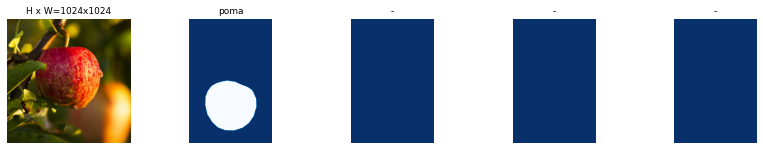

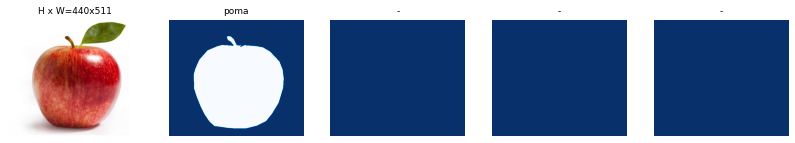

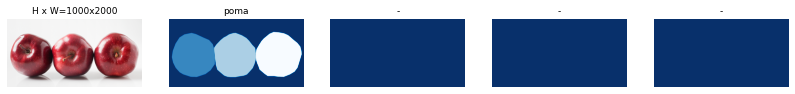

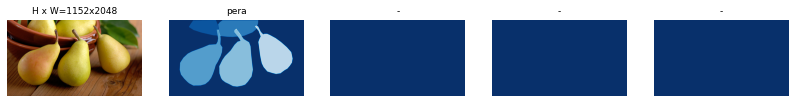

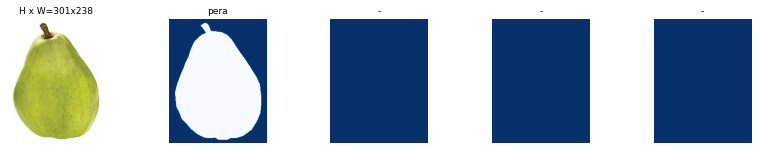

In [ ]:
# Load and display random samples


image_ids = np.random.choice(dataset_train.image_ids, 5)
for image_id in image_ids:
    image = dataset_train.load_image(image_id)
    mask, class_ids = dataset_train.load_mask(image_id)
    visualize.display_top_masks(image, mask, class_ids, dataset_train.class_names)

In [ ]:
# Load the TensorBoard notebook extension
%load_ext tensorboard

**INFERENCIA**

In [ ]:
class InferenceConfig(FruitesConfig):
    """Configuracio per entrenar kes Fruites dataset
    Deriva de la classe base Config i substitueix alguns valors."""
   
    GPU_COUNT = 1
    IMAGES_PER_GPU =1
inference_config = InferenceConfig()

In [ ]:
# Recreate the model in inference mode
model = modellib.MaskRCNN(mode="inference",config=inference_config,model_dir=MODEL_DIR)
#model_path = model.find_last()
model_path = '/gdrive/MyDrive/TFG/software/Fruites/logs/fruites20210609T1538/mask_rcnn_fruites_0100.h5' 
print("Loading weights from ", model_path)
model.load_weights(model_path, by_name=True)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Instructions for updating:
box_ind is deprecated, use box_indices instead


Instructions for updating:
Use `tf.cast` instead.
Loading weights from  /gdrive/MyDrive/TFG/software/Fruites/logs/fruites20210609T1538/mask_rcnn_fruites_0100.h5
Re-starting from epoch 100


In [ ]:
# Infer
start_time = time.time()
 
results = model.detect([image], verbose=1)
print("--- %s seconds ---" % (time.time() - start_time))
r = results[0]

visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'], 
                            dataset_test.class_names, r['scores'], show_mask=False, show_bbox=True)

NameError: ignored

In [ ]:
def get_ax(rows=1, cols=1, size=8):
    """Torna a Matplotlib Axes una matriu on s'usaran
    totes les visualitzacions al quadern.
    
    Change the default size attribute to control the size
    of rendered images
    """
    _, ax = plt.subplots(rows, cols, figsize=(size*cols, size*rows))
    return ax

original_image           shape: (1024, 1024, 3)       min:    0.00000  max:  253.00000  uint8
image_meta               shape: (15,)                 min:    0.00000  max: 4000.00000  float64
gt_class_id              shape: (1,)                  min:    1.00000  max:    1.00000  int32
gt_bbox                  shape: (1, 4)                min:  181.00000  max:  691.00000  int32
gt_mask                  shape: (1024, 1024, 1)       min:    0.00000  max:    1.00000  uint8


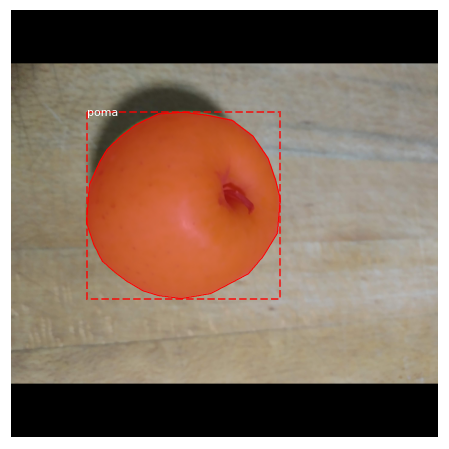

In [ ]:
# Test on a random image

image_id = random.choice(dataset_test.image_ids)
original_image, image_meta, gt_class_id, gt_bbox, gt_mask =\
    modellib.load_image_gt(dataset_test, config, 
                           image_id, use_mini_mask=False)
log ("original_image", original_image)
log ("image_meta", image_meta)
log ("gt_class_id", gt_class_id)
log ("gt_bbox", gt_bbox)
log ("gt_mask", gt_mask)

visualize.display_instances(original_image, gt_bbox, gt_mask, gt_class_id, 
                            dataset_test.class_names, figsize=(8, 8))

Processing 1 images
image                    shape: (1024, 1024, 3)       min:    0.00000  max:  253.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  138.10000  float64
image_metas              shape: (1, 15)               min:    0.00000  max: 1024.00000  int64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32



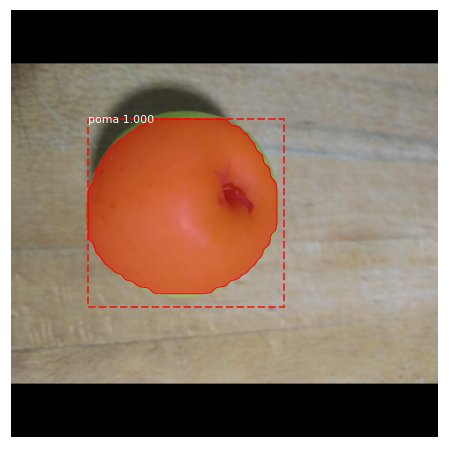

In [ ]:
results = model.detect([original_image], verbose=1)

r = results[0]
visualize.display_instances(original_image, r['rois'], r['masks'], r['class_ids'], 
                            dataset_val.class_names, r['scores'], ax=get_ax())

**MATRIU DE CONFUSIÓ**

In [ ]:
import pandas as pd

#ground-truth and predictions lists
gt_tot = np.array([])
pred_tot = np.array([])
#mAP list
mAP_ = []

#compute gt_tot, pred_tot and mAP for each image in the test dataset
for image_id in dataset_test.image_ids:
    original_image, image_meta, gt_class_id, gt_bbox, gt_mask =\
        modellib.load_image_gt(dataset_test, inference_config, image_id, use_mini_mask=False)
    info = dataset_test.image_info[image_id]

    # Run the model
    results = model.detect([original_image], verbose=1)
    r = results[0]
    
    #compute gt_tot and pred_tot
    gt, pred = utils.gt_pred_lists(gt_class_id, gt_bbox, r['class_ids'], r['rois'])
    gt_tot = np.append(gt_tot, gt)
    pred_tot = np.append(pred_tot, pred)
    
    #precision_, recall_, AP_ 
    AP_, precision_, recall_, overlap_ = utils.compute_ap(gt_bbox, gt_class_id, gt_mask,
                                          r['rois'], r['class_ids'], r['scores'], r['masks'])
    #check if the vectors len are equal
    print("the actual len of the gt vect is : ", len(gt_tot))
    print("the actual len of the pred vect is : ", len(pred_tot))
    
    mAP_.append(AP_)
    print("Average precision of this image : ",AP_)
    print("The actual mean average precision for the whole images (matterport methode) ", sum(mAP_)/len(mAP_))

Processing 1 images
image                    shape: (1024, 1024, 3)       min:    0.00000  max:  226.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  119.10000  float64
image_metas              shape: (1, 15)               min:    0.00000  max: 1024.00000  int64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
the actual len of the gt vect is :  3
the actual len of the pred vect is :  3
Average precision of this image :  0.25
The actual mean average precision for the whole images (matterport methode)  0.25
Processing 1 images
image                    shape: (1024, 1024, 3)       min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 15)               min:    0.00000  max: 1024.00000  int64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


In [ ]:
gt_tot=gt_tot.astype(int)
pred_tot=pred_tot.astype(int)
#save the vectors of gt and pred
save_dir = "output"
gt_pred_tot_json = {"gt_tot" : gt_tot, "pred_tot" : pred_tot}
df = pd.DataFrame(gt_pred_tot_json)
if not os.path.exists(save_dir):
    os.makedirs(save_dir)
df.to_json(os.path.join(save_dir,"gt_pred_test.json"))

ground truth list :  [2 2 2 2 2 2 0 2 2 1 1 1 1 2 1 1 2 2 2 2 2 1 1 1 2 2 2 2 1 1 1 2 2 2 1 1 1
 1 1 1 2 1 1 1 2 0 1 1 1 2 2 2 2 1 1 1 1 2 1 2 2 1 1 2 2 2 1 1 2 2 2 0 2 1
 0 1 1 2 2 2 2 2 2 2 0 2 1 1 1 2 1 2 0 2 2 2 2 2 2 2 1 2 2 2 2 2 2 0 1 1 1
 1 2 2 2 2 2 2 2 1 1 1 1 2 2 1 1 1 2 2 2 2 2 2 2 2 2 1 2 2 2 1 1 1 2 0 2 2
 1 0 0 2 2 2 1 0 0 1 1 0 0]
predicted list :  [2 1 1 1 2 2 1 1 2 1 1 1 1 1 1 1 2 1 1 2 1 1 1 1 2 1 2 1 1 1 1 0 2 1 1 1 1
 1 1 1 2 1 1 1 2 1 1 1 1 1 2 0 1 1 1 1 1 2 1 1 1 1 1 2 2 1 1 1 1 2 1 1 2 1
 1 1 1 2 1 1 2 2 2 1 1 2 1 1 1 2 1 1 2 2 1 2 2 1 2 2 1 1 1 1 1 1 1 1 1 1 1
 1 2 1 1 2 1 2 1 1 1 1 1 0 1 1 1 1 2 1 1 1 2 1 1 2 1 1 1 1 2 1 1 1 1 2 2 1
 1 2 2 1 1 2 1 2 1 1 1 2 1]


/gdrive/My Drive/TFG/Mask_RCNN/mrcnn/utils.py:1168: MatplotlibDeprecationWarning: 
The tick1On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick1line.set_visible instead.
  t.tick1On = False
/gdrive/My Drive/TFG/Mask_RCNN/mrcnn/utils.py:1169: MatplotlibDeprecationWarning: 
The tick2On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick2line.set_visible instead.
  t.tick2On = False
/gdrive/My Drive/TFG/Mask_RCNN/mrcnn/utils.py:1171: MatplotlibDeprecationWarning: 
The tick1On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick1line.set_visible instead.
  t.tick1On = False
/gdrive/My Drive/TFG/Mask_RCNN/mrcnn/utils.py:1172: MatplotlibDeprecationWarning: 
The tick2On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick2line.set_visible instead.
  t.tick2On = False


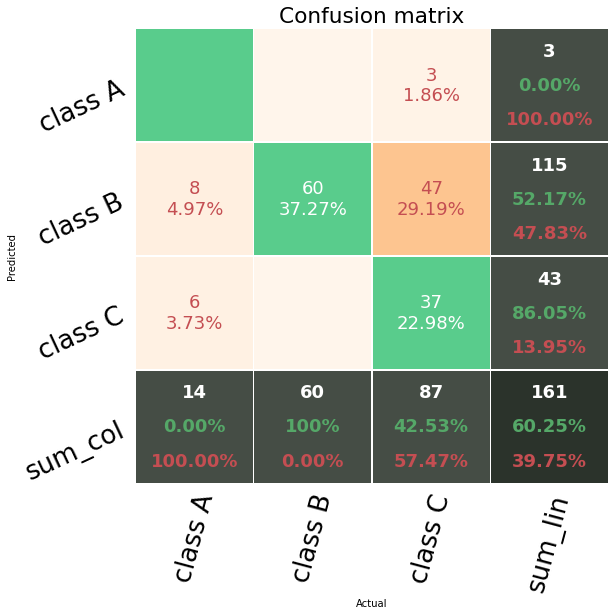

In [ ]:
print("ground truth list : ",gt_tot)
print("predicted list : ",pred_tot)

# en el output de esta función se puede ver la clase que corresponde a cada clasificacion
# pues el 0 es el background, el 2 es maduro y el 3 es podrido (comprobando la posicion del vector con la imagen)
# entonces la clase 1 es verde
# CLASE A = BACKGROUND
# CLASE B = poma
# CLASE C = pera




tp,fp,fn=utils.plot_confusion_matrix_from_data(gt_tot,pred_tot,fz=18, figsize=(9,9), lw=0.5)